In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import itertools
import numpy as np
import sympy as sym 
import random as rd
import statistics as stat
from collections import Counter

N = 500   # numero agenti
G = 2    # numero beni
beta = 0.1
T = 100  # numero di tipi
Tempo=5000


vettore_quantità=np.zeros(G+1)
vettore_prezzi=np.zeros(G+1)
sd_cycles=np.zeros(G+1)    
frac_pop=np.zeros([G+1,Tempo])
network_value=np.zeros(G+1)
utilità=np.zeros(G+1)
somiglianza=np.zeros(G+1)
attrazione=np.zeros(G+1)
matrix = np.zeros([N,6])
sdmatrix = np.zeros ([10,10])

for a_d in np.arange (0, 1, 0.1):
    for a_t in np.arange (0, 1, 0.1):
        
            

        for i in range (N):
            matrix[i][3] = a_t
            matrix[i][4] = a_d        
            matrix[i][0]=50#rd.uniform(6, 50)                  # massa moneta
            matrix[i][1]=format(rd.uniform(0, 1), '.2f') #int(rd.randint(0, T)/T)  # tipo
            matrix[i][2]=format(rd.uniform(0, 1), '.2f')      # attrazione        
            matrix[i][5]=int(rd.randint(0, G))         
                    


        for t in range(Tempo):
            d = Counter(matrix[:,5]) 
        
        
            for i in range(G+1):
                
                frac_pop[i][t]=d[i]
                vettore_quantità[i]=d[i]
                vettore_prezzi[i]=np.log(vettore_quantità[i]+1)
                    
                
                
            giocatore_scelto=rd.randint(0, N-1)
                
            for i in range(G+1):
                somiglianza[i]=0#np.zeros(G+1)
                attrazione[i]=0#np.zeros(G+1)
                for j in range(N):
                    if matrix[j][5] == i and int(giocatore_scelto) != j:
                    
                        attrazione[i]=attrazione[i] + matrix[giocatore_scelto][4]*matrix[j][2]
                    
                        somiglianza[i]=somiglianza[i] + (1-matrix[giocatore_scelto][3])*(1- abs(matrix[giocatore_scelto][1]- matrix[j][1]))
                attrazione[i]=attrazione[i]+matrix[giocatore_scelto][2]*matrix[giocatore_scelto][4]
                if i == matrix[giocatore_scelto][5]:                    
                    network_value[i]=(attrazione[i]+somiglianza[i])/(vettore_quantità[i]-1)
                else:
                    network_value[i]=(attrazione[i]+somiglianza[i])/vettore_quantità[i]
            
                utilità[i] = ((matrix[giocatore_scelto][0]-vettore_prezzi[i])**beta)*(network_value[i])**(1-beta)
                        
        
        
            argmax_utilità=np.argmax(utilità)
        
            matrix[giocatore_scelto][5]=argmax_utilità
        
        
        for i in range (G+1):
            sd_cycles[i]=np.std(frac_pop[i][4000:5000])
        meansd_mean=np.mean (sd_cycles)
            
        sdmatrix[int(a_t*10)][int(a_d*10)]=meansd_mean    

In [2]:
print (sdmatrix)
print (sd_cycles)

[[ 0.          0.          0.16028308  0.          0.32751658  0.
   0.49423161  0.          0.          0.2550085 ]
 [ 0.          0.57480084  0.          0.          2.74680882  0.32561122
   0.          0.          1.34888479  0.25383722]
 [ 0.25940445  0.          0.48875306  0.          0.69364333  0.14529663
   0.40420452  0.          0.23739231  1.168659  ]
 [ 0.          0.          1.21076935  0.          0.          1.15926408
   0.37588414  0.32546445  0.87496846  0.4270403 ]
 [ 0.80011994  0.          0.45160744  0.          0.45298355  1.78250141
   1.78843116  0.75264827  0.          0.        ]
 [ 3.09068339  0.80762644  0.2102443   0.          0.23473389  0.43536341
   2.14675148  1.10224258  6.51549634  2.0853277 ]
 [ 0.28751116  0.          2.12757332  0.          1.40835308  2.32708096
   1.53945281  2.27580125  7.9454912   1.63503273]
 [ 0.          0.39904923  0.          3.68621227  0.          1.59450944
   2.57103877  0.88023501  4.2221836   1.47914168]
 [ 2.928

<IPython.core.display.Javascript object>


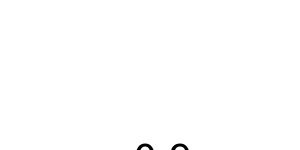

In [3]:
%matplotlib notebook
import matplotlib
from mpl_toolkits import mplot3d
from matplotlib import cm

cmap = cm.Reds
norm = matplotlib.colors.Normalize(vmin=-0, vmax=10)

Xx = np.arange(0, 1, 0.1)
Yy = np.arange(0, 1, 0.1)

Xx, Yy = np.meshgrid(Xx, Yy)

#fig = plt.figure()
fig, ax = plt.subplots()

ax.pcolormesh(Xx, Yy, sdmatrix, shading='gouraud', cmap=cmap, norm=norm) #shading='gouraud',

ax.set_xlabel('$K$')
ax.set_ylabel('$p$')



#ax.title.set_text('A=1.0')


cax = fig.add_axes([0.905, 0.11, 0.01, 0.77])
fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap),cax=cax)

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import itertools
import numpy as np
import sympy as sym 
import random as rd
import statistics as stat
from collections import Counter

N = 500   # numero agenti
G = 2    # numero beni
beta = 0.1
T = 100  # numero di tipi
Tempo=5000


vettore_quantità=np.zeros(G+1)
vettore_prezzi=np.zeros(G+1)
sd_cycles=np.zeros(G+1)    
frac_pop=np.zeros([G+1,Tempo])
network_value=np.zeros(G+1)
utilità=np.zeros(G+1)
somiglianza=np.zeros(G+1)
attrazione=np.zeros(G+1)
matrix = np.zeros([N,6])
sdmatrix = np.zeros ([10,10])

for a_d in np.arange (0, 1, 0.1):
    for a_t in np.arange (0, 1, 0.1):
        
            

        for i in range (N):
            matrix[i][3] = a_t
            matrix[i][4] = a_d        
            matrix[i][0]=rd.uniform(6, 50)                  # massa moneta
            matrix[i][1]=format(rd.uniform(0, 1), '.2f') #int(rd.randint(0, T)/T)  # tipo
            matrix[i][2]=format(rd.uniform(0, 1), '.2f')      # attrazione        
            matrix[i][5]=int(rd.randint(0, G))         
                    


        for t in range(Tempo):
            d = Counter(matrix[:,5]) 
        
        
            for i in range(G+1):
                
                frac_pop[i][t]=d[i]
                vettore_quantità[i]=d[i]
                vettore_prezzi[i]=np.log(vettore_quantità[i]+1)
                    
                
                
            giocatore_scelto=rd.randint(0, N-1)
                
            for i in range(G+1):
                somiglianza[i]=0#np.zeros(G+1)
                attrazione[i]=0#np.zeros(G+1)
                for j in range(N):
                    if matrix[j][5] == i and int(giocatore_scelto) != j:
                    
                        attrazione[i]=attrazione[i] + matrix[giocatore_scelto][4]*matrix[j][2]
                    
                        somiglianza[i]=somiglianza[i] + (1-matrix[giocatore_scelto][3])*(1- abs(matrix[giocatore_scelto][1]- matrix[j][1]))
                attrazione[i]=attrazione[i]+matrix[giocatore_scelto][2]*matrix[giocatore_scelto][4]
                if i == matrix[giocatore_scelto][5]:                    
                    network_value[i]=(attrazione[i]+somiglianza[i])/(vettore_quantità[i]-1)
                else:
                    network_value[i]=(attrazione[i]+somiglianza[i])/vettore_quantità[i]
            
                utilità[i] = ((matrix[giocatore_scelto][0]-vettore_prezzi[i])**beta)*(network_value[i])**(1-beta)
                        
        
        
            argmax_utilità=np.argmax(utilità)
        
            matrix[giocatore_scelto][5]=argmax_utilità
        
        
        for i in range (G+1):
            sd_cycles[i]=np.std(frac_pop[i][4000:5000])
        meansd_mean=np.mean (sd_cycles)
            
        sdmatrix[int(a_t*10)][int(a_d*10)]=meansd_mean  

In [ ]:
print (sdmatrix)
print (sd_cycles)

In [ ]:
%matplotlib notebook
import matplotlib
from mpl_toolkits import mplot3d
from matplotlib import cm

cmap = cm.Reds
norm = matplotlib.colors.Normalize(vmin=-0, vmax=10)

Xx = np.arange(0, 1, 0.1)
Yy = np.arange(0, 1, 0.1)

Xx, Yy = np.meshgrid(Xx, Yy)

#fig = plt.figure()
fig, ax = plt.subplots()

ax.pcolormesh(Xx, Yy, sdmatrix,cmap=cmap, norm=norm) #shading='gouraud',

ax.set_xlabel('$\u03B1_{i,d}$')
ax.set_ylabel('$\u03B1_{i,t}$')



#ax.title.set_text('A=1.0')


cax = fig.add_axes([0.905, 0.11, 0.01, 0.77])
fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap),cax=cax)